# Task-2         
## Movie Rating Prediction

In [447]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [448]:
df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [450]:
df.shape

(15509, 10)

In [451]:
df.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [452]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [453]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
import re

# Functions to clean movie names
def clean_movie_name(name):
    return re.sub(r'^[^a-zA-Z0-9]+', '', str(name)).strip()

# Applying function to 'Name' column
df['Name'] = df['Name'].apply(clean_movie_name)

# Displaying first few rows
df[['Name']].head(20)

,Name
0,
1,Gadhvi (He thought he was Gandhi)
2,Homecoming
3,Yaaram
4,And Once Again
5,Aur Pyaar Ho Gaya
6,Yahaan
7,in for Motion
8,A Question Mark
9,Andheri


In [ ]:
# Finding duplicate movies Name that is release in same year
duplicate_movies = df[df.duplicated(subset=['Name', 'Year'], keep=False)].sort_values(by=['Name', 'Year'])
duplicate_movies[['Name', 'Year']].head(20)

,Name,Year
135,A Ballad of Maladies,-2016.0
136,A Ballad of Maladies,-2016.0
585,Achanak,-1988.0
586,Achanak,-1988.0
953,Amrit,-1941.0
954,Amrit,-1941.0
1249,Arab Ka Sona - Abu Kaalia,-1979.0
1250,Arab Ka Sona - Abu Kaalia,-1979.0
1768,Balidan,-1992.0
1769,Balidan,-1992.0


In [456]:
# removing the duplicate rows that have same movie name and release year
df = df.drop_duplicates(subset=['Name', 'Year'], keep='first')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
# Searching one movie with its name
df[df['Name'].str.contains('First Time - Pehli Baar')]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
4722,First Time - Pehli Baar,-2009.0,NaN,NaN,NaN,NaN,Raja Bundela,Zeenat Aman,Nitin Arora,Raj Babbar


In [458]:
# Cleaning and converting the 'Year' column 
type(df['Year'][0])

numpy.float64

In [ ]:
# Extracting only the four-digit year from any string
df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})')

# Converting to integer, handling errors
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int16')

# Displaying
display(df[['Year']].head())

,Year
0,<NA>
1,2019
2,2021
3,2019
4,2010


In [460]:
#Checking for year datatype
type(df['Year'].dtypes)

pandas.core.arrays.integer.Int16Dtype

In [461]:
df['Year'].isna().sum()

527

In [462]:
df['Duration'] = df['Duration'].astype(str).str.extract(r'(\d+)').astype('float32')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce').astype('float32')  

In [463]:
df.dtypes

Name         object
Year          Int16
Duration    float32
Genre        object
Rating      float64
Votes       float32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

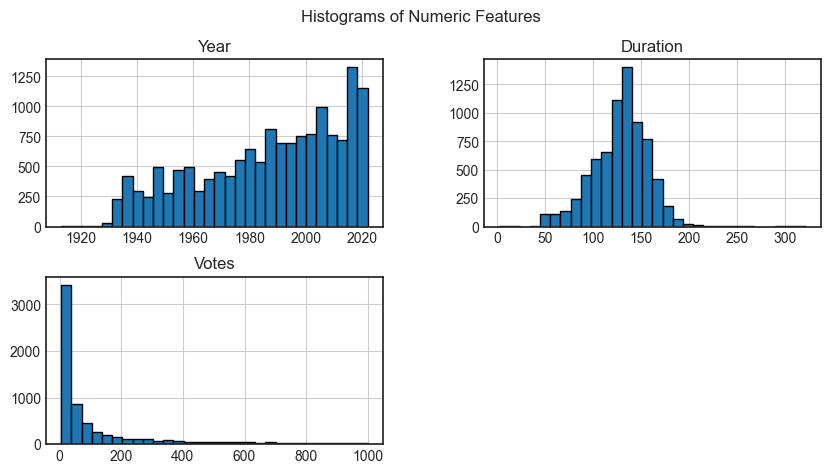

In [464]:
# Histogram for independent numeric features
plt.style.use('seaborn-v0_8-white')
df[['Year', 'Duration', 'Votes']].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.suptitle('Histograms of Numeric Features')
plt.show()

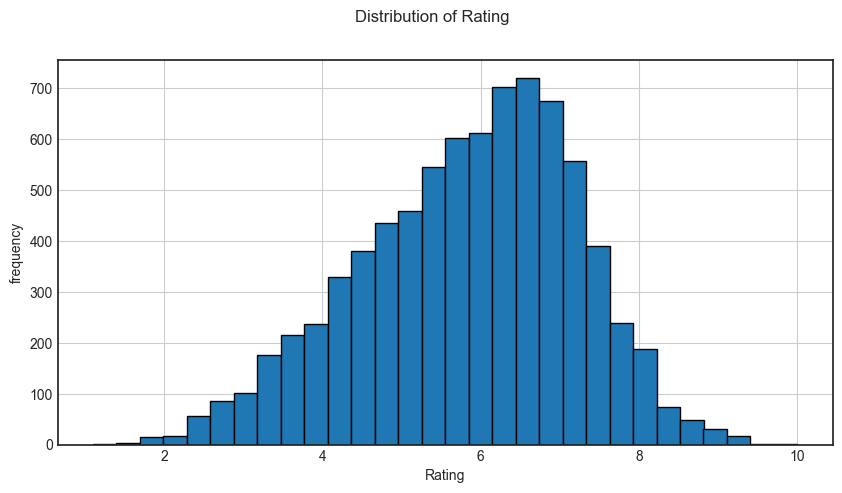

In [465]:
df['Rating'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.suptitle('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('frequency')
plt.show()

<Axes: >

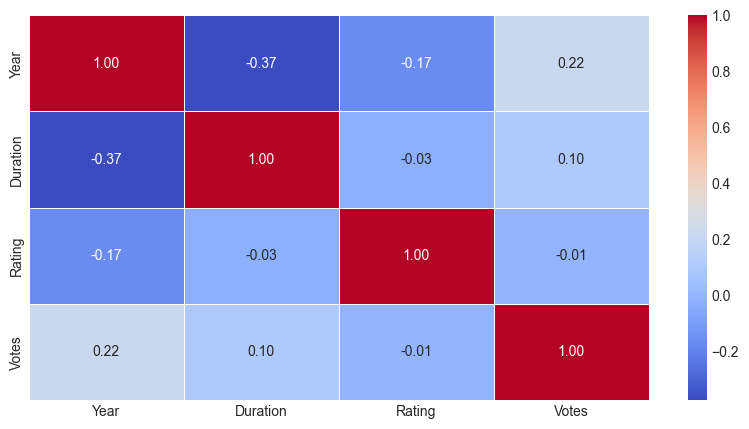

In [466]:
#Relationship between numeric variables
new_df=  df.drop(columns=['Name','Actor 1','Actor 2','Actor 3','Director','Genre'])
corr=new_df.corr()
plt.figure(figsize=(10,5))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)  

In [468]:
# High rated movie details
high_rating_movies = df[df['Rating'] > 8.5]
high_rating_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
967,An Insignificant Man,2016,96.0,"Documentary, Thriller",8.7,NaN,Khushboo Ranka,Vinay Shukla,Arvind Kejriwal,Saurabh Bhardwaj
1314,Ashok Vatika,2018,97.0,Drama,9.3,7.0,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
1341,Atal Faisla,2018,127.0,Drama,8.8,5.0,Abdul Sattar,Sahil Akhtar,Himayat Ali,Aman Jain
1432,Awasaan,2020,101.0,Drama,8.7,21.0,Rajat Kumar Chaturvedi,Arjun Chakrabarty,Trishala Idnani,Sarvagya Jain
1469,B for Bundelkhand,2017,117.0,Drama,8.8,5.0,Vishal Mourya,Bharat Chawla,Nemi Chandra Jha,Moumita Nandi
...,...,...,...,...,...,...,...,...,...,...
14861,Vidyoday,2018,108.0,Documentary,9.2,35.0,Vidhi Kasliwal,Aarti S. Bagdi,Alok Nath,NaN
14898,Viraat,2021,150.0,Crime,8.9,294.0,Narendra Singh,Kritika Sachdeva,Ravi Jhanghu,Lokesh Tilakdhari
15071,Win Marathon,2018,94.0,"Drama, Sport",9.0,70.0,Aryan Neeraaj Anand,Shubhanshu Satyadeo,Aryan Neeraaj Anand,Ankita Bahuguna
15199,Yatrik,1952,NaN,Drama,8.8,8.0,Kartick Chattopadhyay,Vasant Choudhury,Arundhati Devi,Tulsi Chakraborty


In [ ]:
# Filling the missing Year values with median
df['Year'].fillna(df['Year'].median(), inplace=True)

# Fill missing values with median
df['Duration'].fillna(df['Duration'].median(), inplace=True)

# Filling Genres with 'Unknown'
df['Genre'].fillna('Unknown', inplace=True)

# Cleaning and converting Votes to numeric. Fill missing values with median
df['Votes'] = df['Votes'].astype(str).str.replace('[^\d.]', '', regex=True)  # Convert to string and clean
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce').astype('float32')  # Convert back to float
df['Votes'].fillna(df['Votes'].median(), inplace=True)  # Fill missing values

# Filling Director with 'Unknown'
df['Director'].fillna('Unknown', inplace=True)

# Filling Actor1, Actor2, Actor3 with 'Unknown'
df['Actor 1'].fillna('Unknown', inplace=True)
df['Actor 2'].fillna('Unknown', inplace=True)    
df['Actor 3'].fillna('Unknown', inplace=True)

df['Rating'] = df['Rating'].astype('float32')

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
C:\Users\stuty\AppData\Local\Temp\ipykernel_20712\1015896922.py:12: SyntaxWarning: invalid escape sequence '\d'
  df['Votes'] = df['Votes'].astype(str).str.replace('[^\d.]', '', regex=True)  # Convert to string and clean


In [470]:
Genre_Average_Rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_Average_Rating'] =Genre_Average_Rating
Director_Average_Rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_Average_Rating'] =Director_Average_Rating
Actor1_Average_Rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_Average_Rating'] =Actor1_Average_Rating
Actor2_Average_Rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_Average_Rating'] =Actor2_Average_Rating
Actor3_Average_Rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_Average_Rating'] =Actor3_Average_Rating
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
0,,1991,131.0,Drama,NaN,35.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,6.352081,5.700000,NaN,5.229412,NaN
1,Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.352081,7.000000,6.850000,7.000000,7.000000
2,Homecoming,2021,90.0,"Drama, Musical",NaN,35.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,6.493104,NaN,7.000000,7.350000,NaN
3,Yaaram,2019,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.722500,4.400000,5.420000,4.400000,4.450000
4,And Once Again,2010,105.0,Drama,NaN,35.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,6.352081,6.333333,7.000000,5.742857,5.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,131.0,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,5.092566,4.075000,6.025532,3.700000,4.600000
15505,Zulmi,1999,129.0,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.468266,5.225000,5.481707,4.645454,5.617143
15506,Zulmi Raj,2005,131.0,Action,NaN,35.0,Kiran Thej,Sangeeta Tiwari,Unknown,Unknown,5.092566,NaN,NaN,6.623500,6.521993
15507,Zulmi Shikari,1988,131.0,Action,NaN,35.0,Unknown,Unknown,Unknown,Unknown,5.092566,6.420000,6.750400,6.623500,6.521993


### Label Encoding for Unique Categorical Values

In [471]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = label_enc.fit_transform(df[col])

In [472]:
df.isna().sum() 

Name                          0
Year                          0
Duration                      0
Genre                         0
Rating                     7570
Votes                         0
Director                      0
Actor 1                       0
Actor 2                       0
Actor 3                       0
Genre_Average_Rating         70
Director_Average_Rating    3959
Actor1_Average_Rating      3076
Actor2_Average_Rating      2683
Actor3_Average_Rating      2230
dtype: int64

In [473]:
# Removing the null values of Director_Average_rating and Actor1, Actor2, Actor3 Average_Rating
df = df.dropna(subset=['Director_Average_Rating', 'Actor1_Average_Rating', 'Actor2_Average_Rating', 'Actor3_Average_Rating'])

In [474]:
df.isna().sum() 

Name                          0
Year                          0
Duration                      0
Genre                         0
Rating                     1827
Votes                         0
Director                      0
Actor 1                       0
Actor 2                       0
Actor 3                       0
Genre_Average_Rating          9
Director_Average_Rating       0
Actor1_Average_Rating         0
Actor2_Average_Rating         0
Actor3_Average_Rating         0
dtype: int64

### Training the model

In [ ]:
# Splitting the dataset into train and test
train_df = df[df['Rating'].notna()]  # Training data (Rating is NOT NULL)
test_df = df[df['Rating'].isna()]    # Testing data (Rating is NULL)

# Checking the shapes
print(f"Training Data Shape: {train_df.shape}")
print(f"Testing Data Shape: {test_df.shape}")

Training Data Shape: (7915, 15)
Testing Data Shape: (1827, 15)


In [ ]:
from sklearn.model_selection import train_test_split

X= train_df[['Year','Votes','Duration','Genre_Average_Rating','Director_Average_Rating','Actor1_Average_Rating','Actor2_Average_Rating','Actor3_Average_Rating']]
y=train_df['Rating']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print(f"Training Set Shape: {X_train.shape}, {y_train.shape}")
print(f"Validation Set Shape: {X_val.shape}, {y_val.shape}")

Training Set Shape: (6332, 8), (6332,)
Validation Set Shape: (1583, 8), (1583,)


In [479]:
train_data= X_train.join(y_train)
train_data

,Year,Votes,Duration,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating,Rating
8471,2017,399.0,113.0,5.291667,5.450000,4.937500,4.500000,5.900000,4.5
8161,2018,7.0,92.0,5.703089,6.750000,6.600000,6.750000,6.750000,6.6
8458,1986,18.0,131.0,5.524359,4.700000,4.700000,5.759259,5.014286,4.7
10021,2015,25.0,137.0,5.092566,6.750000,6.200000,6.200000,6.200000,6.2
2697,2003,17.0,117.0,5.092566,4.250000,5.250000,5.291526,4.618182,5.8
...,...,...,...,...,...,...,...,...,...
10141,1976,32.0,131.0,5.612981,6.446154,6.095082,6.396774,5.936842,5.4
10459,2019,786.0,108.0,6.278572,3.500000,4.500000,4.500000,4.500000,4.5
1527,1984,65.0,125.0,5.092566,5.131250,5.742537,5.689873,5.571429,6.3
14947,2002,257.0,100.0,5.326966,4.700000,4.780000,5.120588,3.750000,3.7


In [ ]:
print(train_df.isna().sum()) 

Name                       0
Year                       0
Duration                   0
Genre                      0
Rating                     0
Votes                      0
Director                   0
Actor 1                    0
Actor 2                    0
Actor 3                    0
Genre_Average_Rating       0
Director_Average_Rating    0
Actor1_Average_Rating      0
Actor2_Average_Rating      0
Actor3_Average_Rating      0
dtype: int64


In [481]:
train_data = train_df.drop(columns=['Name'], errors='ignore')

In [482]:
print(train_data.columns)

Index(['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'Genre_Average_Rating', 'Director_Average_Rating',
       'Actor1_Average_Rating', 'Actor2_Average_Rating',
       'Actor3_Average_Rating'],
      dtype='object')


## Model Evaluation

### Linear Regression and  Random Forest

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Building a Linear Regression model
fitted_model_lr = LinearRegression()
#Training the model
fitted_model_lr.fit(X_train,y_train)
#Making predictions
y_pred_lr = fitted_model_lr.predict(X_val)

#Building a Random Forest Model
fitted_model_rf = RandomForestRegressor()
#Training the model
fitted_model_rf.fit(X_train, y_train)
#Making predictions
y_pred_rf = fitted_model_rf.predict(X_val)

In [484]:
# Evaluating the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


MSE_lr =  mean_squared_error(y_val, y_pred_lr) 
MAE_lr = mean_absolute_error(y_val, y_pred_lr)
R2_Score_lr = r2_score(y_val, y_pred_lr)

print('   Performance Evaluation for Linear Regression Model: ')
print('Mean squared error value is: ', MSE_lr)
print('Mean absolute error value is: ', MAE_lr)
print('R2 score value is: ', R2_Score_lr)

MSE_rf =  mean_squared_error(y_val, y_pred_rf) 
MAE_rf = mean_absolute_error(y_val, y_pred_rf)
R2_Score_rf = r2_score(y_val, y_pred_rf)

print('\n   Performance Evaluation for Random Forest Model: ')
print('Mean squared error value is: ', MSE_rf)
print('Mean absolute error value is: ', MAE_rf)
print('R2 score value is: ', R2_Score_rf)

   Performance Evaluation for Linear Regression Model: 
Mean squared error value is:  0.4637632467187269
Mean absolute error value is:  0.5021402634338846
R2 score value is:  0.7436354401152313

   Performance Evaluation for Random Forest Model: 
Mean squared error value is:  0.41288587390053855
Mean absolute error value is:  0.4293853439188275
R2 score value is:  0.7717600389982016


### XGBoost

In [ ]:
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor
fitted_model_xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)

# Training the model
fitted_model_xgb.fit(X_train, y_train)

# Making predictions
y_pred_xgb = fitted_model_xgb.predict(X_val)

In [ ]:
MSE_xgb =  mean_squared_error(y_val, y_pred_xgb) 
MAE_xgb = mean_absolute_error(y_val, y_pred_xgb)
R2_Score_xgb = r2_score(y_val, y_pred_xgb)

print('Performance Evaluation for XGB Model: ')
print('Mean squared error value is: ', MSE_xgb)
print('Mean absolute error value is: ', MAE_xgb)
print('R2 score value is: ', R2_Score_xgb)

   Performance Evaluation for XGB Model: 
Mean squared error value is:  0.39904574
Mean absolute error value is:  0.4344024
R2 score value is:  0.7794107485634516


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

# Initializing XGBoost Regressor
xgb_model = xgb.XGBRegressor()

# Grid Search
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 1.0}


In [ ]:
# Getting the best parameters
best_params = grid_search.best_params_

# Training final XGBoost model
xgb_final = xgb.XGBRegressor(**best_params)

# Fitting on training data
xgb_final.fit(X_train, y_train)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Making predictions
y_pred = xgb_final.predict(X_val)

r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.8772
MAE: 0.3210
RMSE: 0.4713


In [ ]:
# Predicting ratings for the test dataset
test_df['Predicted_Rating'] = xgb_final.predict(X_test)

# Displaying predictions
print(test_df[['Name', 'Predicted_Rating']].head())


               Name  Predicted_Rating
4    And Once Again          6.548739
23         12 Years          7.009742
29         14 Phere          6.976928
31  150 Seconds Ago          7.954336
37             1911          7.139276


C:\Users\stuty\AppData\Local\Temp\ipykernel_20712\3943825770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_Rating'] = xgb_final.predict(X_test)


## **Conclusion**  

In this analysis, we evaluated multiple regression models to predict movie ratings. Initially, we applied **Linear Regression** and **Random Forest Regressor**, which achieved **R² scores of 74 and 77, respectively**. However, **XGBoost outperformed both models with an R² score of 77.9**, making it the best choice for our prediction task.  

To further improve the model, we performed **hyperparameter tuning** using GridSearchCV, which significantly enhanced the performance, achieving an **R² score of 87**.  

We divided the dataset into two parts:  
- **Training Data**: Contained rows where the "Rating" column was not null.  
- **Testing Data**: Consisted of rows where the "Rating" column had missing values.  

After training the optimized **XGBoost model**, we used it to predict the movie ratings for the **test dataset**, successfully filling in the missing values. This approach ensures a robust and accurate rating prediction model.
